In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 20)

data=pd.read_csv("./data/Churn_Modelling.csv")


In [3]:
data.head()

data.describe().T

data.isnull().sum()

data.nunique()

data.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

<AxesSubplot:xlabel='Exited', ylabel='count'>

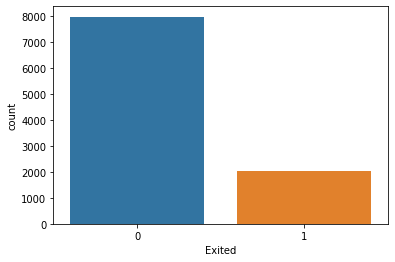

In [4]:
sns.countplot(x=data["Exited"])


<AxesSubplot:xlabel='Gender', ylabel='count'>

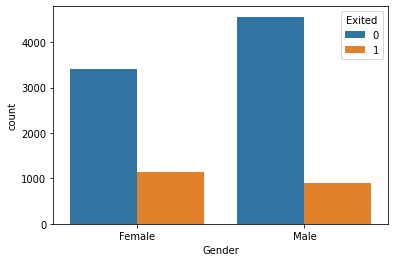

In [5]:

sns.countplot(x="Gender",hue="Exited",data=data)



<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

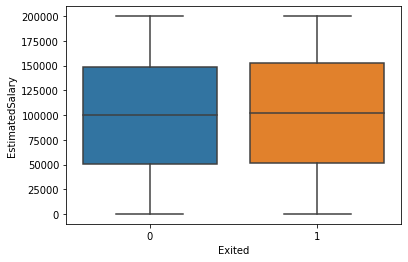

In [6]:
sns.boxplot(y="EstimatedSalary",x="Exited",data=data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

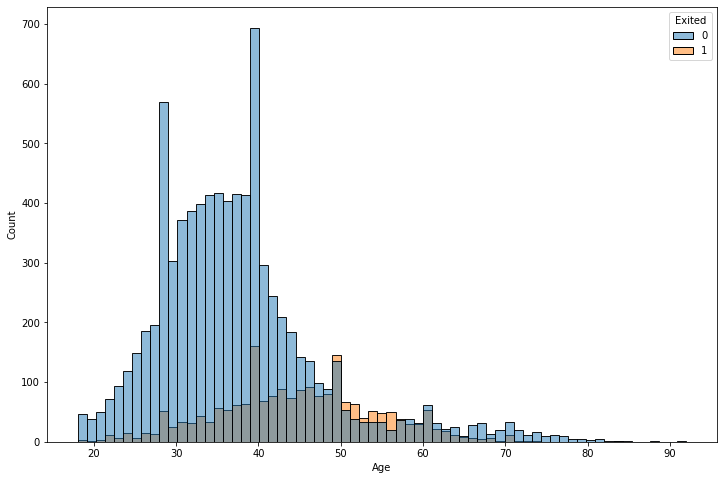

In [7]:
plt.figure(figsize=(12,8))
sns.histplot(x="Age",hue="Exited",data=data)

<AxesSubplot:xlabel='Exited', ylabel='Age'>

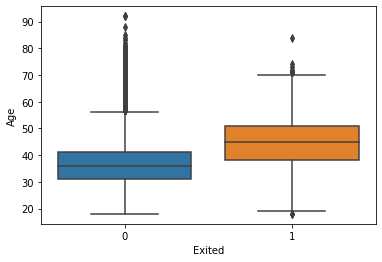

In [8]:
sns.boxplot(y="Age",x="Exited",data=data)

In [9]:
categorical_col=[col for col in data.columns if data[col].dtype=="object" and data[col].nunique()<10]
categorical_col

['Geography', 'Gender']

In [10]:
data=pd.get_dummies(data,drop_first=True)

data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
q25=np.quantile(data["Age"],0.25)
q75=np.quantile(data["Age"],0.75)

iqr=q75-q25

lower=q25-1.5*iqr
upper=q75+1.5*iqr

data=data[(data["Age"]<upper)&(data["Age"]>lower)]



In [13]:
X=data.drop("Exited",axis=1)
y=data["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scale=StandardScaler()
train=scale.fit_transform(X_train)
test=scale.transform(X_test)

X_train=pd.DataFrame(train,columns=X_train.columns)
X_test=pd.DataFrame(test,columns=X_test.columns)

In [18]:
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))



[[2204   96]
 [ 421  156]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2300
           1       0.62      0.27      0.38       577

    accuracy                           0.82      2877
   macro avg       0.73      0.61      0.64      2877
weighted avg       0.80      0.82      0.79      2877



In [32]:
from sklearn.ensemble import RandomForestClassifier

params={"n_estimators":[100,150,200,250,300,350],
         "max_depth":[6,9,12,15,18,21]
       }

model=RandomForestClassifier(min_samples_leaf=10,n_jobs=-1)

grid=GridSearchCV(model,params,cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

grid.best_params_

model=grid.best_estimator_
pred=model.predict(X_test)

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))


[[2228   62]
 [ 317  236]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2290
           1       0.79      0.43      0.55       553

    accuracy                           0.87      2843
   macro avg       0.83      0.70      0.74      2843
weighted avg       0.86      0.87      0.85      2843

